In [1]:
from pathlib import Path

import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset

The dataset is subset of Places365 Standard dataset. Each images was cropped to square and then rescaled to 32x32.

In [2]:
TRAINVAL_DIR = Path('/mnt/arch_data/datasets/inz_final_dataset/trainval')

In [3]:
!tree -d '/mnt/arch_data/datasets/inz_final_dataset/trainval'

/mnt/arch_data/datasets/inz_final_dataset/trainval
├── forest
├── mountains
└── water

4 directories


In [4]:
orig_img_ds = ImageFolder(TRAINVAL_DIR)
print(len(orig_img_ds))

180600


In [5]:
def rgb_to_hsv(rgb_array: np.ndarray) -> np.ndarray:
    """Converts image from rgb to hsv. The function expects input array to be of shape (H,W,3), of
    dtype np.float64 with values in range (0.0, 1.0). The output array is of shape (3,H,W) of dtype
    np.float64 and values in range (0.0, 1.0)."""

    maxc = np.max(rgb_array, axis=2)
    minc = np.min(rgb_array, axis=2)
    v = maxc
    rangec = maxc - minc
    vgr0 = maxc > 0.0
    rgr0 = rangec > 0.0
    s = np.zeros_like(v)
    s[vgr0] = rangec[vgr0] / maxc[vgr0]

    h = np.zeros_like(maxc)
    r, g, b = rgb_array[..., 0], rgb_array[..., 1], rgb_array[..., 2]
    ind = (r == maxc) & rgr0
    h[ind] = ((g[ind] - b[ind]) / rangec[ind]) % 6.0
    ind = (g == maxc) & rgr0
    h[ind] = 2.0 + ((b[ind] - r[ind]) / rangec[ind])
    ind = (b == maxc) & rgr0
    h[ind] = 4.0 + ((r[ind] - g[ind]) / rangec[ind])

    h = h / 6.0
    return np.stack([h, s, v])

In [6]:
def plot_channels_histograms(img: PIL.Image, bins: int = 100):
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    img = np.array(img).astype(np.float64) / 255.0

    for i, channel in enumerate(['red', 'green', 'blue']):
        axs[0, i].hist(img[:,:,i].flatten(), bins=bins)
        axs[0, i].set_title(channel)

    img = rgb_to_hsv(img)
    for i, channel in enumerate(['hue','saturation', 'value']):
        axs[1, i].hist(img[i].flatten(), bins=bins)
        axs[1, i].set_title(channel)

    plt.show()

In [7]:
def show_img_plot_hist(dataset: Dataset, bins: int = 100):
    img = dataset[np.random.randint(0, len(dataset))][0]
    plt.imshow(img)
    plt.show()
    plot_channels_histograms(img, dataset)

In [8]:
print(orig_img_ds.class_to_idx)
orig_img_ds.classes

{'forest': 0, 'mountains': 1, 'water': 2}


['forest', 'mountains', 'water']

Category: water


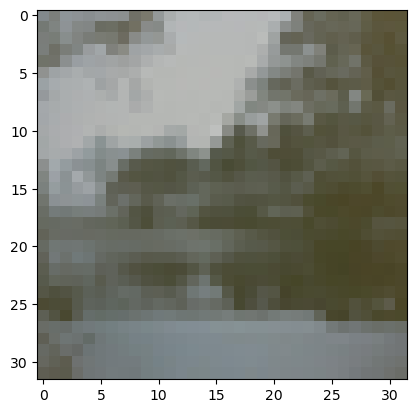

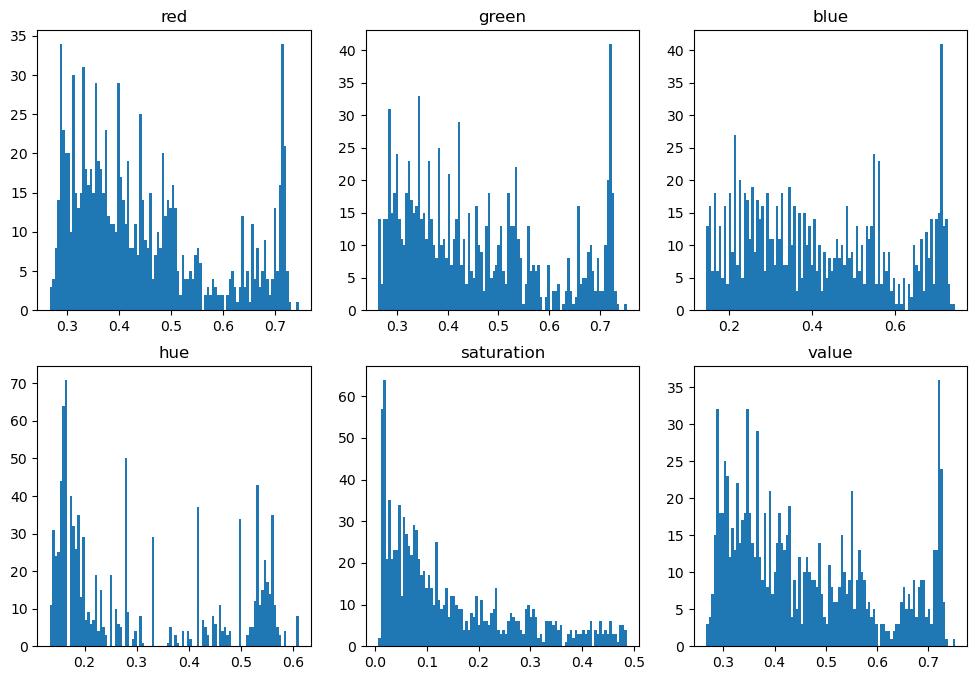

-----------------------------------


Category: water


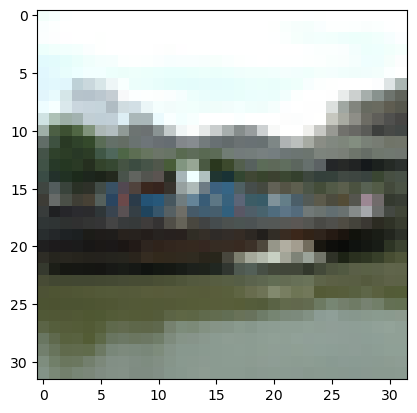

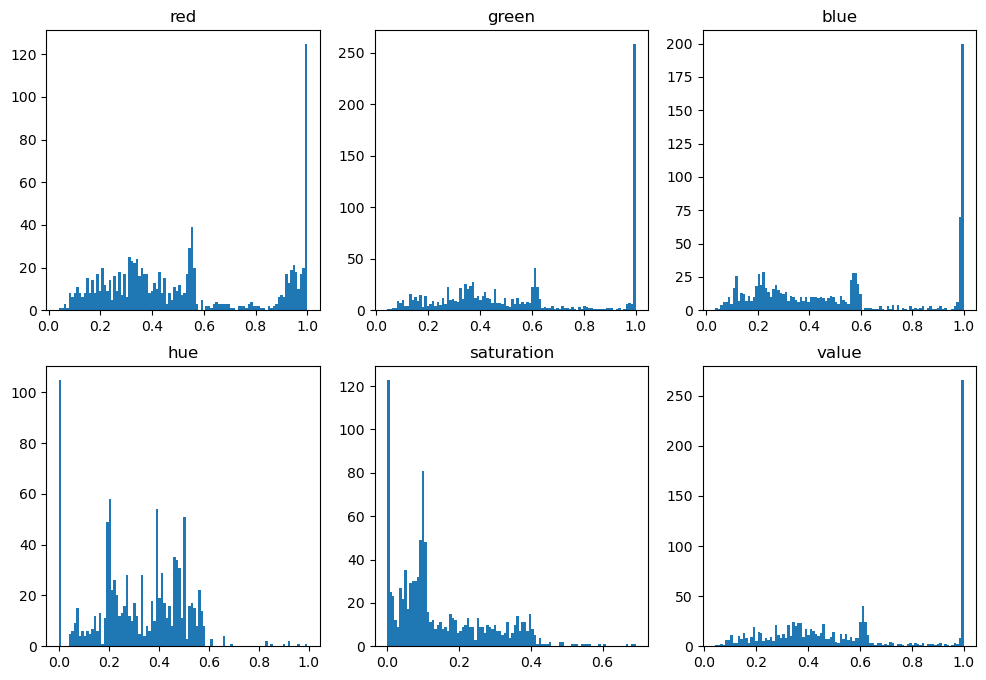

-----------------------------------


Category: mountains


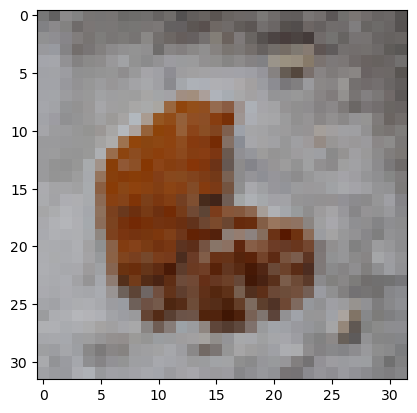

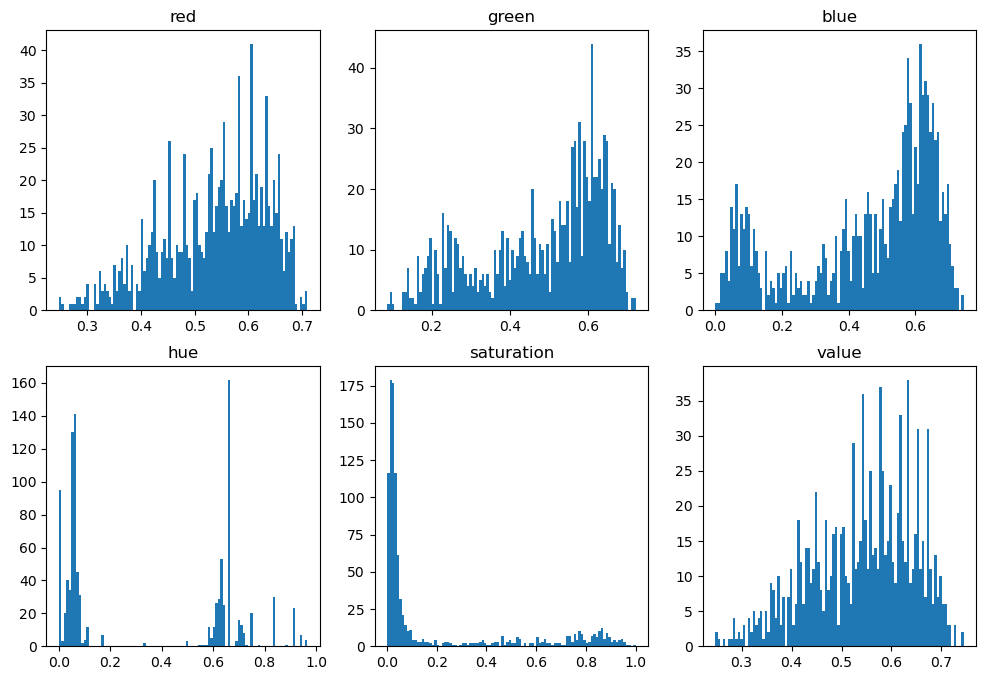

-----------------------------------


Category: water


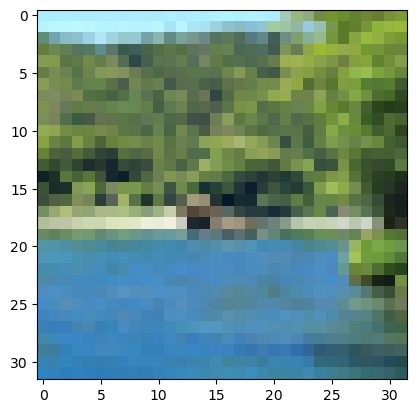

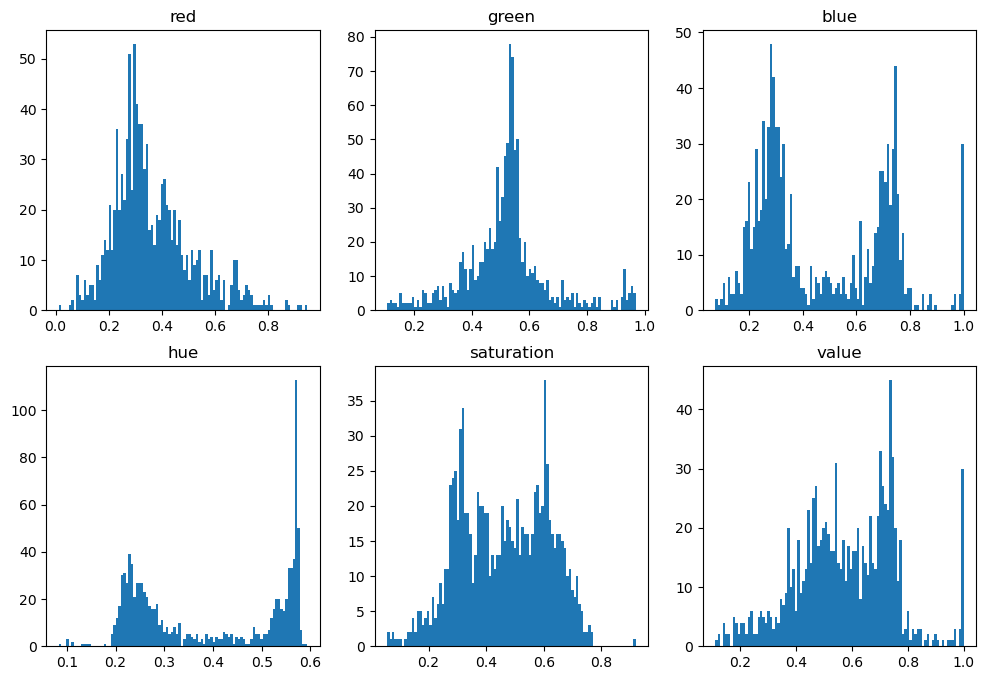

-----------------------------------


Category: mountains


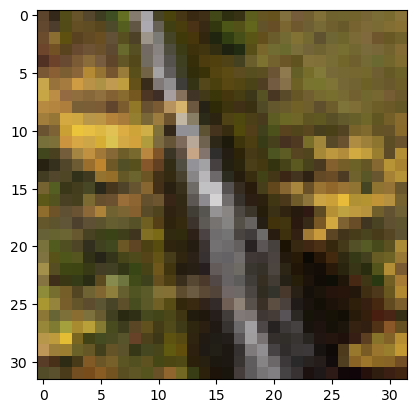

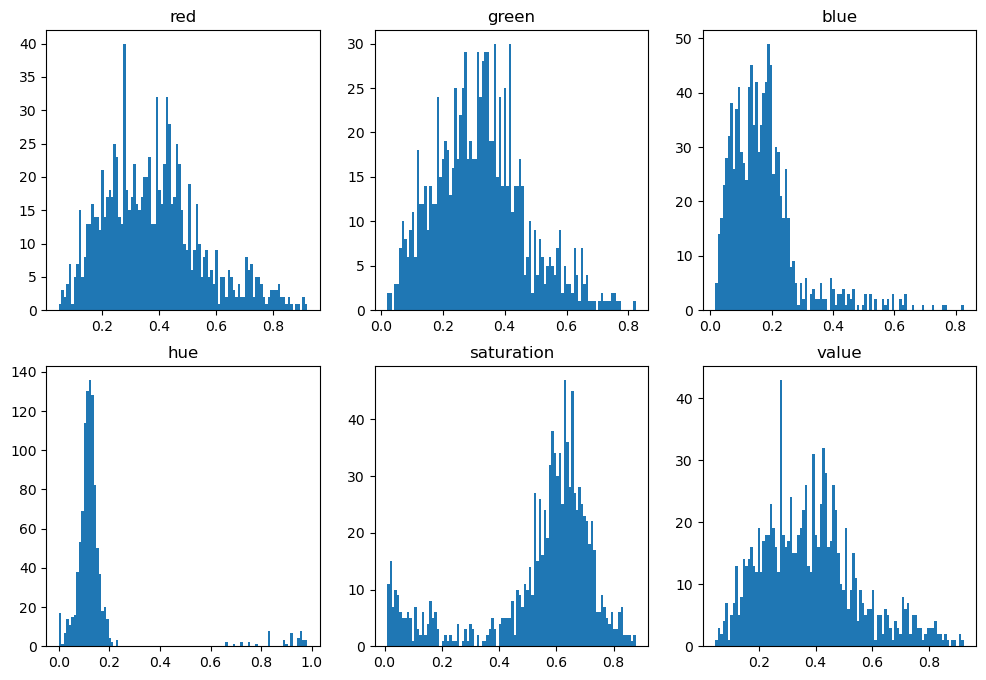

-----------------------------------


Category: forest


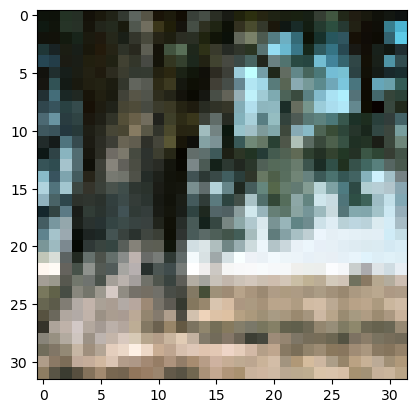

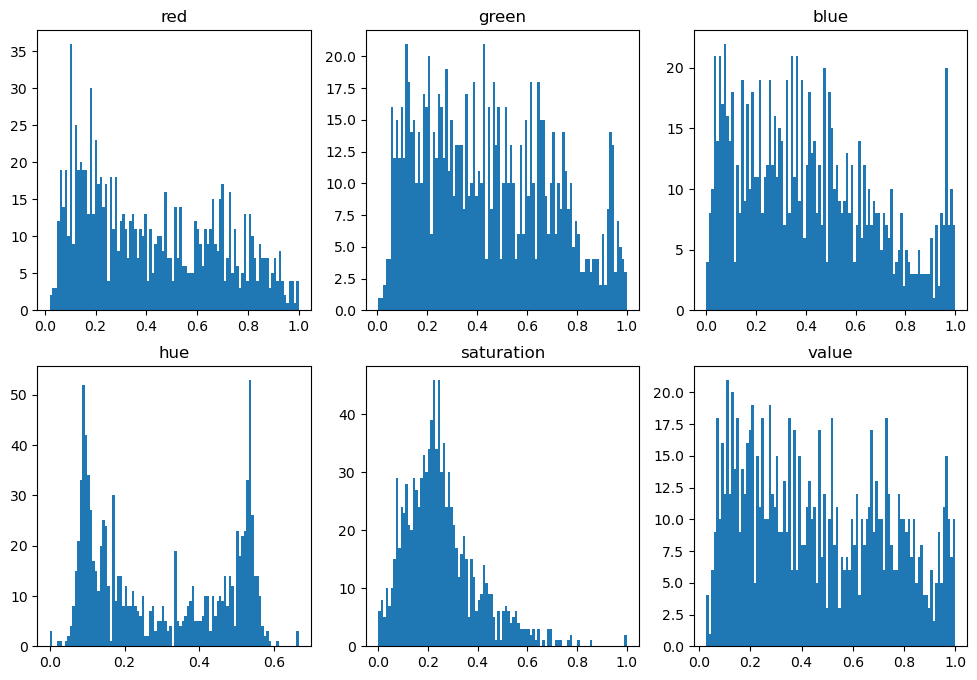

-----------------------------------


Category: water


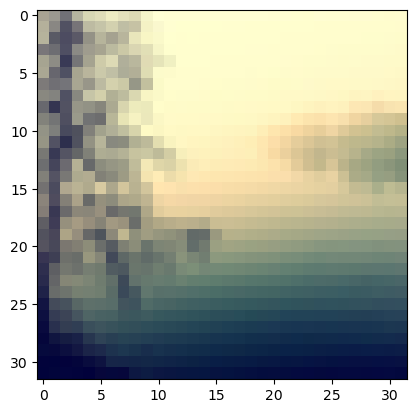

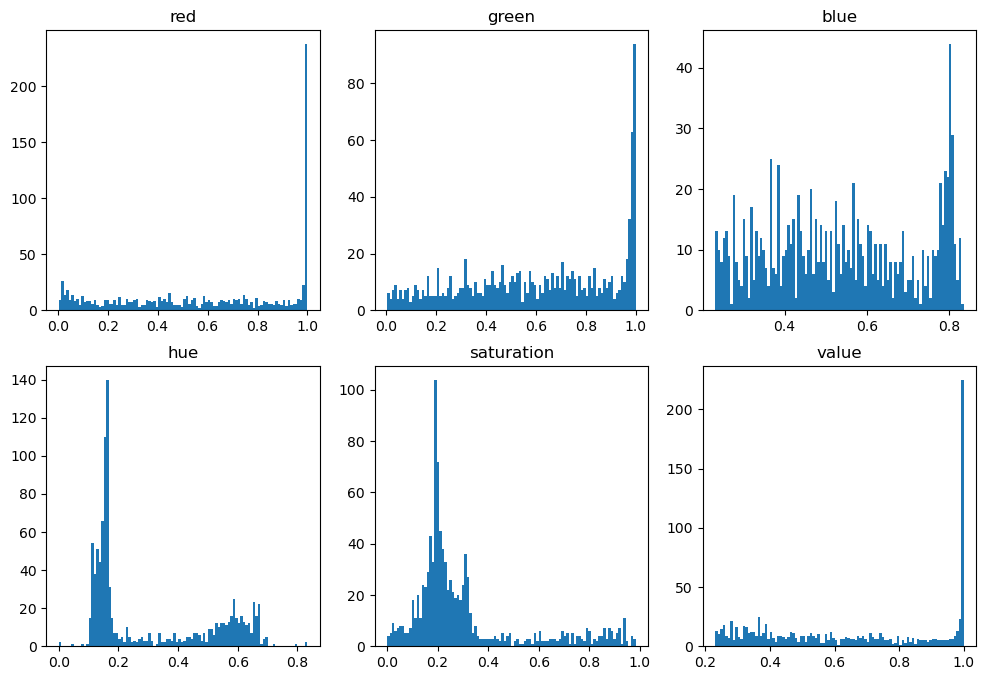

-----------------------------------


Category: mountains


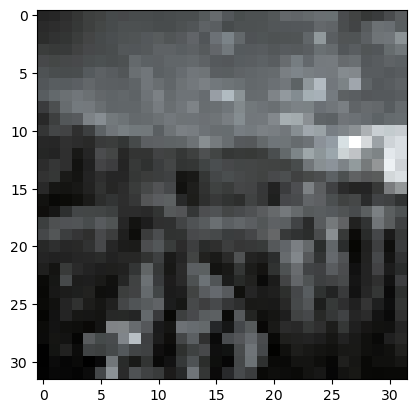

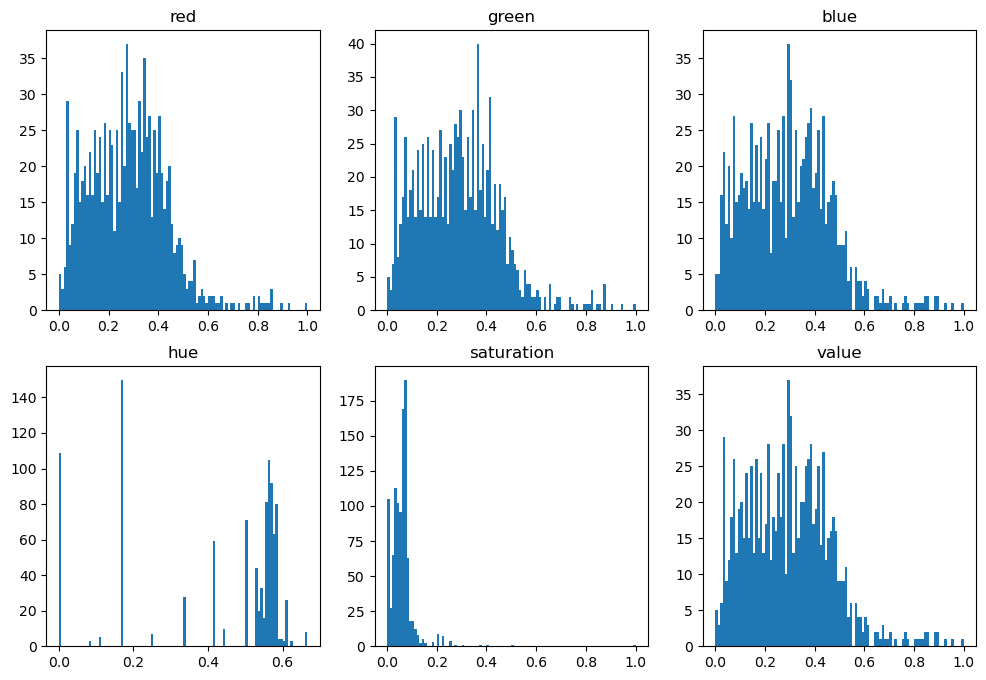

-----------------------------------


Category: water


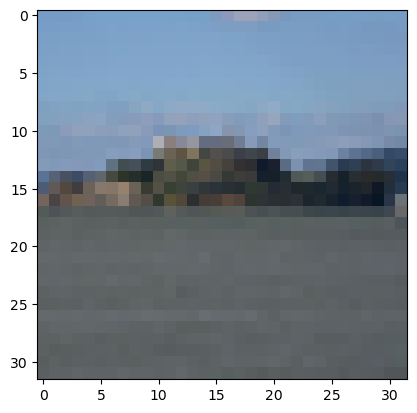

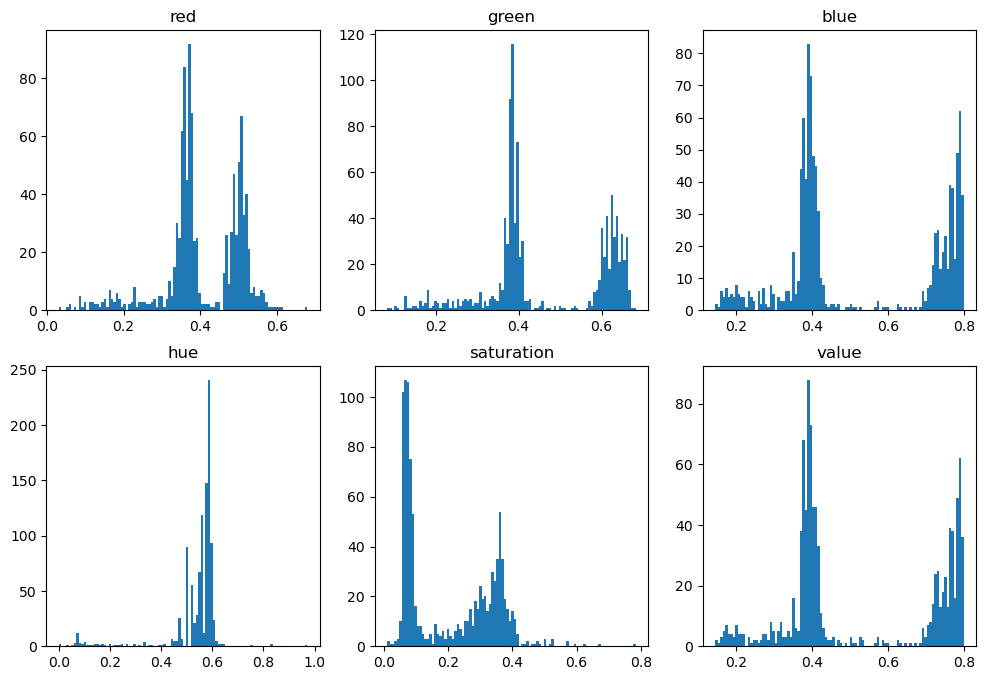

-----------------------------------


Category: mountains


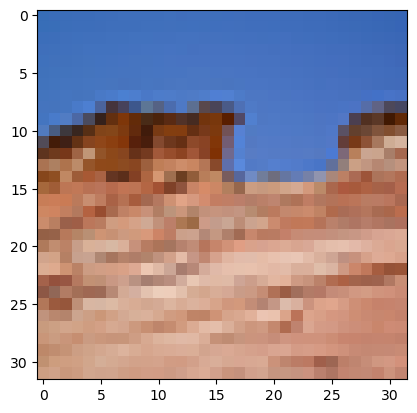

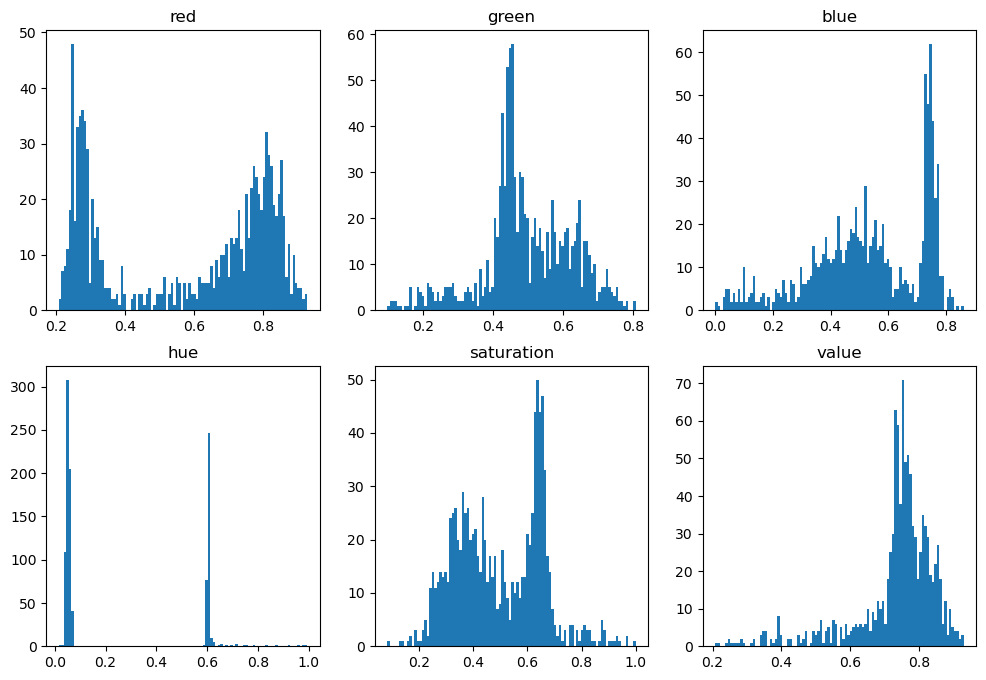

-----------------------------------




In [9]:
for _ in range(10):
    img, label = orig_img_ds[np.random.randint(0, len(orig_img_ds))]
    print(f'Category: {orig_img_ds.classes[label]}')
    plt.imshow(img)
    plt.show()
    plot_channels_histograms(img)
    print('-----------------------------------\n\n')